<a href="https://colab.research.google.com/github/truongthuanr/transfer/blob/main/08_SSSMarket_truongthuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import seaborn as sns

In [3]:
train_url = "https://raw.githubusercontent.com/truongthuanr/self-project/main/dataset/sss/train.csv"
df = pd.read_csv(train_url)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4705 non-null   int64  
 1   sku                   4705 non-null   int64  
 2   short_description     4640 non-null   object 
 3   price                 4705 non-null   int64  
 4   discount              4705 non-null   int64  
 5   discount_rate         4705 non-null   int64  
 6   rating_average        4705 non-null   float64
 7   review_count          4705 non-null   int64  
 8   order_count           4705 non-null   int64  
 9   favourite_count       4705 non-null   int64  
 10  thumbnail_url         4705 non-null   object 
 11  categories            4705 non-null   object 
 12  liked                 4705 non-null   bool   
 13  rating_summary        4705 non-null   object 
 14  brand                 4705 non-null   object 
 15  current_seller       

In [5]:
df.head()

,id,sku,short_description,price,discount,discount_rate,rating_average,review_count,order_count,favourite_count,thumbnail_url,categories,liked,rating_summary,brand,current_seller,other_sellers,configurable_options,extra_feature,cloth_type
0,0,4777164499549,\n \n- Loại : Quần Thể Thao Đen.\n- Kiểu Dáng ...,99000,101000,51,0.0,0,0,1,https://salt.tikicdn.com/cache/280x280/ts/prod...,"{""id"": 914, ""name"": ""Thời Trang"", ""is_leaf"": f...",False,[],"{""id"": 111461, ""name"": ""OEM"", ""slug"": ""oem""}","{""id"": 36387, ""sku"": ""5716562721707"", ""store_i...","[{""id"": 134556, ""name"": ""Mualayeushop"", ""link""...","[{""code"": ""option1"", ""name"": ""Size"", ""position...",[],top_t-shirt_sweatshirt shoe pants
1,1,2931572867679,\nÁo Len Nam Dày Bs33 được may từ chất liệu le...,400000,0,0,0.0,0,0,1,https://salt.tikicdn.com/cache/280x280/ts/prod...,"{""id"": 2, ""name"": ""Root"", ""is_leaf"": false}",False,[],"{""id"": 111461, ""name"": ""OEM"", ""slug"": ""oem""}","{""id"": 10025, ""sku"": ""4689826428364"", ""store_i...",[],"[{""code"": ""option1"", ""name"": ""Màu"", ""position""...",[],sweater
2,2,6427102533481,\n \n- Loại : Quần Âu Thêu Vương Miện\n- Kiểu ...,159000,141000,47,4.5,14,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,"{""id"": 914, ""name"": ""Thời Trang"", ""is_leaf"": f...",False,[],"{""id"": 111461, ""name"": ""OEM"", ""slug"": ""oem""}","{""id"": 9674, ""sku"": ""5288509925221"", ""store_id...",[],"[{""code"": ""option1"", ""name"": ""Size"", ""position...",[],watch shoe shirt_blouse pants
3,3,1590440568400,"Khách vui lòng xem kĩ số đo sản phẩm, hình thậ...",109000,81000,43,4.2,15,0,0,https://salt.tikicdn.com/cache/280x280/ts/prod...,"{""id"": 914, ""name"": ""Thời Trang"", ""is_leaf"": f...",False,[],"{""id"": 111461, ""name"": ""OEM"", ""slug"": ""oem""}","{""id"": 22226, ""sku"": ""1822886614091"", ""store_i...",[],NaN,[],belt dress bag_wallet shoe
4,4,8690273838961,"sét áo dài cách tân mới chât đẹpsize S,M,Lset ...",290000,160000,36,3.0,3,0,5,https://salt.tikicdn.com/cache/280x280/ts/prod...,"{""id"": 914, ""name"": ""Thời Trang"", ""is_leaf"": f...",False,[],"{""id"": 111461, ""name"": ""OEM"", ""slug"": ""oem""}",NaN,[],"[{""code"": ""option1"", ""name"": ""szie"", ""position...",[],bag_wallet dress shoe


In [6]:
df.thumbnail_url[0]

'https://salt.tikicdn.com/cache/280x280/ts/product/96/e2/3f/d058858d876dd97a6eab9842cdd4d771.jpg'

Total images:

In [7]:
total_images = df.thumbnail_url.notna().sum()
total_images

4705

# Exploratory Data Anaysis

## Label in images

In [35]:
type(df["cloth_type"][0]) ==list 

True

In [157]:
labels = df.cloth_type.tolist()
labels = [item if type(item) == list else [str(item)] for item in labels]

In [158]:
all_label = [label for sub in labels for label in sub]

In [170]:
labels = Counter(all_label)
# sort by frequency
label_name = [tag for tag,count in labels.most_common()]
label_freq = [count for tag,count in labels.most_common()]

Whichs are the tops used label?

(0.0, 3000.0)

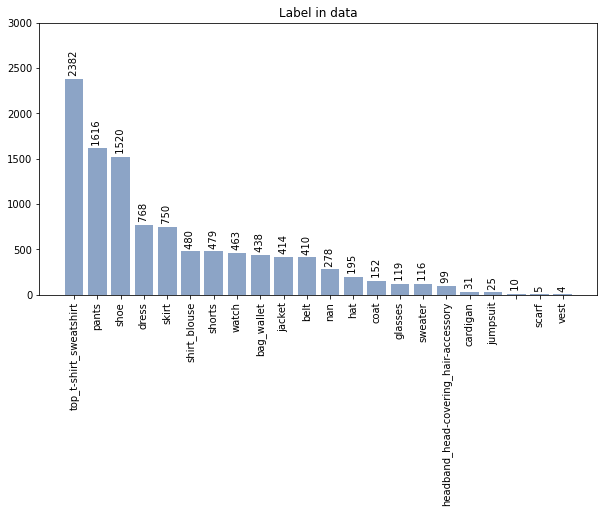

In [187]:
fig = plt.figure(figsize=(10,5))
plt.bar(label_name,label_freq, color="#8CA4C6")
plt.title("Label in data")
plt.xticks(rotation=90)
for i, (tag,count) in enumerate(labels.most_common()):
  plt.text(i, count, f" {count} ", rotation=90, ha="center", va="bottom", color="black")
plt.ylim(0,3000)


Why is na label?

In [112]:
na_images = df[df.cloth_type.isna() == True].thumbnail_url

## Color in Image

In [199]:
import urllib
from io import StringIO
import requests
from urllib.request import urlopen

from io import BytesIO

In [200]:
# response = requests.get(images[1])
img = Image.open(urlopen(images[1]))

In [202]:
type(img)

PIL.JpegImagePlugin.JpegImageFile